In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from surprise import Dataset
from surprise import Reader
from surprise import evaluate, print_perf
from surprise import KNNWithMeans
from surprise import BaselineOnly
from surprise import GridSearch

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('./movielens_small/ratings.csv')

In [3]:
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [32]:
df.rating.unique()

array([ 3. ,  5. ,  4. ,  2. ,  1. ,  4.5,  3.5,  2.5,  0.5,  1.5])

In [5]:
reader = Reader(rating_scale=(1,5))

In [6]:
# (I) using dataset sort by time to for training and testing
df = df.sort_values(by='timestamp')
l = len(df)
train = df[:int(l*0.8)]
test = df[int(l*0.8):]
train_data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)
train_data.split(n_folds=5)

In [7]:
# (II) train/test data from stratify sampling
X_train, X_test, y_train, y_test = train_test_split(df, df.rating, test_size=0.2, stratify=df.rating)
Xtrain_data = Dataset.load_from_df(X_train[['userId', 'movieId', 'rating']], reader)
Xtrain_data.split(n_folds=5)

# Baseline

In [8]:
algoBL = BaselineOnly()

In [9]:
perfBL = evaluate(algoBL, train_data, measures=['RMSE', 'MAE', 'FCP'])

Evaluating RMSE, MAE, FCP of algorithm BaselineOnly.

------------
Fold 1
Estimating biases using als...
RMSE: 0.8964
MAE:  0.6940
FCP:  0.6701
------------
Fold 2
Estimating biases using als...
RMSE: 0.8979
MAE:  0.6984
FCP:  0.6608
------------
Fold 3
Estimating biases using als...
RMSE: 0.9002
MAE:  0.6997
FCP:  0.6602
------------
Fold 4
Estimating biases using als...
RMSE: 0.9062
MAE:  0.7004
FCP:  0.6679
------------
Fold 5
Estimating biases using als...
RMSE: 0.9029
MAE:  0.6981
FCP:  0.6594
------------
------------
Mean RMSE: 0.9007
Mean MAE : 0.6981
Mean FCP : 0.6637
------------
------------


In [10]:
perfBLX = evaluate(algoBL, Xtrain_data, measures=['RMSE', 'MAE', 'FCP'])

Evaluating RMSE, MAE, FCP of algorithm BaselineOnly.

------------
Fold 1
Estimating biases using als...
RMSE: 0.8888
MAE:  0.6863
FCP:  0.6412
------------
Fold 2
Estimating biases using als...
RMSE: 0.8951
MAE:  0.6948
FCP:  0.6514
------------
Fold 3
Estimating biases using als...
RMSE: 0.9033
MAE:  0.6987
FCP:  0.6420
------------
Fold 4
Estimating biases using als...
RMSE: 0.9040
MAE:  0.6998
FCP:  0.6585
------------
Fold 5
Estimating biases using als...
RMSE: 0.8947
MAE:  0.6909
FCP:  0.6449
------------
------------
Mean RMSE: 0.8972
Mean MAE : 0.6941
Mean FCP : 0.6476
------------
------------


In [11]:
# using SGD (stochastic Gradient Descent)
algoBLsgd = BaselineOnly(bsl_options={'method':'sgd', 'learning_rate':0.00005})

In [12]:
perfBLsgd = evaluate(algoBLsgd, train_data, measures=['RMSE', 'MAE', 'FCP'])

Evaluating RMSE, MAE, FCP of algorithm BaselineOnly.

------------
Fold 1
Estimating biases using sgd...
RMSE: 1.0057
MAE:  0.8097
FCP:  0.6589
------------
Fold 2
Estimating biases using sgd...
RMSE: 1.0128
MAE:  0.8169
FCP:  0.6482
------------
Fold 3
Estimating biases using sgd...
RMSE: 1.0081
MAE:  0.8119
FCP:  0.6474
------------
Fold 4
Estimating biases using sgd...
RMSE: 1.0189
MAE:  0.8180
FCP:  0.6564
------------
Fold 5
Estimating biases using sgd...
RMSE: 1.0123
MAE:  0.8131
FCP:  0.6484
------------
------------
Mean RMSE: 1.0116
Mean MAE : 0.8139
Mean FCP : 0.6519
------------
------------


# KNNWithMeans

In [13]:
algoKNNmeans = KNNWithMeans(k=40)

## (I) with time-sort training data

In [14]:
perf = evaluate(algoKNNmeans, train_data, measures=['RMSE', 'MAE', 'FCP'])

Evaluating RMSE, MAE, FCP of algorithm KNNWithMeans.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9223
MAE:  0.7075
FCP:  0.6520
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9228
MAE:  0.7098
FCP:  0.6514
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9244
MAE:  0.7112
FCP:  0.6487
------------
Fold 4
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9310
MAE:  0.7117
FCP:  0.6609
------------
Fold 5
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9268
MAE:  0.7095
FCP:  0.6495
------------
------------
Mean RMSE: 0.9255
Mean MAE : 0.7099
Mean FCP : 0.6525
------------
------------


### (Ia) Grid Search - k nearest-neighbors from 10 to 100 with interval 10

In [15]:
param_grid_k = {'k': range(10,110,10)}
grid_search_k = GridSearch(KNNWithMeans, param_grid_k, measures = ['RMSE', 'MAE', 'FCP'])
grid_search_k.evaluate(train_data)

[{'k': 10}, {'k': 20}, {'k': 30}, {'k': 40}, {'k': 50}, {'k': 60}, {'k': 70}, {'k': 80}, {'k': 90}, {'k': 100}]
------------
Parameters combination 1 of 10
params:  {'k': 10}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 0.9370
Mean MAE : 0.7216
Mean FCP : 0.6452
------------
------------
Parameters combination 2 of 10
params:  {'k': 20}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similar

In [16]:
grid_search_k.best_score

CaseInsensitiveDefaultDict(list,
                           {'fcp': 0.65268086201250086,
                            'mae': 0.70989527131474606,
                            'rmse': 0.92546373329786236})

In [17]:
grid_search_k.best_params

CaseInsensitiveDefaultDict(list,
                           {'fcp': {'k': 90},
                            'mae': {'k': 50},
                            'rmse': {'k': 40}})

In [18]:
result_df_k = pd.DataFrame.from_dict(grid_search_k.cv_results)
result_df_k

,RMSE,k,params,scores
0,0.936996,10,{'k': 10},"{'RMSE': 0.936996234185, 'MAE': 0.721645671766..."
1,0.927337,20,{'k': 20},"{'RMSE': 0.927337370038, 'MAE': 0.712419879648..."
2,0.925598,30,{'k': 30},"{'RMSE': 0.925597622439, 'MAE': 0.710214213144..."
3,0.925464,40,{'k': 40},"{'RMSE': 0.925463733298, 'MAE': 0.709937904296..."
4,0.925571,50,{'k': 50},"{'RMSE': 0.925570723612, 'MAE': 0.709895271315..."
5,0.925760,60,{'k': 60},"{'RMSE': 0.925759933737, 'MAE': 0.709986077252..."
6,0.926026,70,{'k': 70},"{'RMSE': 0.926026300534, 'MAE': 0.710137060325..."
7,0.926289,80,{'k': 80},"{'RMSE': 0.92628921246, 'MAE': 0.710319764098,..."
8,0.926491,90,{'k': 90},"{'RMSE': 0.926491428013, 'MAE': 0.710512343611..."
9,0.926614,100,{'k': 100},"{'RMSE': 0.926614350979, 'MAE': 0.710625807425..."


### Accuracy plot

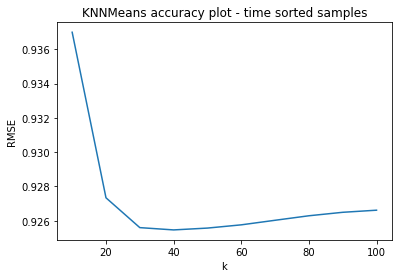

In [19]:
plt.plot(result_df_k['k'], result_df_k['RMSE'])
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('KNNMeans accuracy plot - time sorted samples')

### (Ib) Grid Search - multiple hyper parameters 

In [20]:
param_grid = {'k': [30, 40, 50],
              'sim_options': {'name': ['msd', 'cosine', 'pearson'],
                              'min_support': [1, 5],
                              'user_based': [False]}
              }

In [21]:
grid_search = GridSearch(KNNWithMeans, param_grid, measures = ['RMSE', 'MAE', 'FCP'])

[{'k': 30, 'sim_options': {'name': 'msd', 'min_support': 1, 'user_based': False}}, {'k': 30, 'sim_options': {'name': 'msd', 'min_support': 5, 'user_based': False}}, {'k': 30, 'sim_options': {'name': 'cosine', 'min_support': 1, 'user_based': False}}, {'k': 30, 'sim_options': {'name': 'cosine', 'min_support': 5, 'user_based': False}}, {'k': 30, 'sim_options': {'name': 'pearson', 'min_support': 1, 'user_based': False}}, {'k': 30, 'sim_options': {'name': 'pearson', 'min_support': 5, 'user_based': False}}, {'k': 40, 'sim_options': {'name': 'msd', 'min_support': 1, 'user_based': False}}, {'k': 40, 'sim_options': {'name': 'msd', 'min_support': 5, 'user_based': False}}, {'k': 40, 'sim_options': {'name': 'cosine', 'min_support': 1, 'user_based': False}}, {'k': 40, 'sim_options': {'name': 'cosine', 'min_support': 5, 'user_based': False}}, {'k': 40, 'sim_options': {'name': 'pearson', 'min_support': 1, 'user_based': False}}, {'k': 40, 'sim_options': {'name': 'pearson', 'min_support': 5, 'user_base

In [22]:
grid_search.evaluate(train_data)

------------
Parameters combination 1 of 18
params:  {'k': 30, 'sim_options': {'name': 'msd', 'min_support': 1, 'user_based': False}}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 0.9222
Mean MAE : 0.7080
Mean FCP : 0.6476
------------
------------
Parameters combination 2 of 18
params:  {'k': 30, 'sim_options': {'name': 'msd', 'min_support': 5, 'user_based': False}}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity mat

/Users/chinwen/anaconda/envs/personlization/lib/python3.6/site-packages/surprise/prediction_algorithms/algo_base.py:231: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 0.9324
Mean MAE : 0.7160
Mean FCP : 0.6470
------------
------------
Parameters combination 4 of 18
params:  {'k': 30, 'sim_options': {'name': 'cosine', 'min_support': 5, 'user_based': False}}
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 0.9352
Mean MAE : 0.7143
Mean FCP : 0.652

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 0.9313
Mean MAE : 0.7108
Mean FCP : 0.6537
------------
------------
Parameters combination 18 of 18
params:  {'k': 50, 'sim_options': {'name': 'pearson', 'min_support': 5, 'user_based': False}}
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 0.9374
Mean MAE : 0.7140
Mean 

In [23]:
grid_search.best_params

CaseInsensitiveDefaultDict(list,
                           {'fcp': {'k': 50,
                             'sim_options': {'min_support': 5,
                              'name': 'msd',
                              'user_based': False}},
                            'mae': {'k': 50,
                             'sim_options': {'min_support': 1,
                              'name': 'msd',
                              'user_based': False}},
                            'rmse': {'k': 50,
                             'sim_options': {'min_support': 1,
                              'name': 'msd',
                              'user_based': False}}})

In [24]:
grid_search.best_score

CaseInsensitiveDefaultDict(list,
                           {'fcp': 0.65524441309038262,
                            'mae': 0.70393151409272181,
                            'rmse': 0.91795551434236788})

In [25]:
results_dfKNNmeansmGS = pd.DataFrame.from_dict(grid_search.cv_results)
results_dfKNNmeansmGS.head()

,MAE,RMSE,k,params,scores,sim_options
0,0.708022,0.922182,30,"{'k': 30, 'sim_options': {'name': 'msd', 'min_...","{'RMSE': 0.92218214452, 'MAE': 0.70802214693, ...","{'name': 'msd', 'min_support': 1, 'user_based'..."
1,0.709327,0.930809,30,"{'k': 30, 'sim_options': {'name': 'msd', 'min_...","{'RMSE': 0.930809209738, 'MAE': 0.709326776647...","{'name': 'msd', 'min_support': 5, 'user_based'..."
2,0.716023,0.932392,30,"{'k': 30, 'sim_options': {'name': 'cosine', 'm...","{'RMSE': 0.93239194842, 'MAE': 0.716022911203,...","{'name': 'cosine', 'min_support': 1, 'user_bas..."
3,0.714266,0.935235,30,"{'k': 30, 'sim_options': {'name': 'cosine', 'm...","{'RMSE': 0.935235037585, 'MAE': 0.714266283538...","{'name': 'cosine', 'min_support': 5, 'user_bas..."
4,0.714694,0.936085,30,"{'k': 30, 'sim_options': {'name': 'pearson', '...","{'RMSE': 0.936085451341, 'MAE': 0.714694428666...","{'name': 'pearson', 'min_support': 1, 'user_ba..."


## (II) with stratify samping data

In [26]:
perf = evaluate(algoKNNmeans, Xtrain_data, measures=['RMSE', 'MAE', 'FCP'])

Evaluating RMSE, MAE, FCP of algorithm KNNWithMeans.

------------
Fold 1
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9253
MAE:  0.7059
FCP:  0.6205
------------
Fold 2
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9255
MAE:  0.7101
FCP:  0.6348
------------
Fold 3
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9333
MAE:  0.7143
FCP:  0.6249
------------
Fold 4
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9354
MAE:  0.7151
FCP:  0.6371
------------
Fold 5
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9244
MAE:  0.7074
FCP:  0.6317
------------
------------
Mean RMSE: 0.9288
Mean MAE : 0.7106
Mean FCP : 0.6298
------------
------------


### Grid Search - k nearest-neighbors from 10 to 100 with interval 10

In [27]:
param_grid_k = {'k': range(10,110,10)}
grid_search_kX = GridSearch(KNNWithMeans, param_grid_k, measures = ['RMSE', 'MAE', 'FCP'])
grid_search_kX.evaluate(Xtrain_data)

[{'k': 10}, {'k': 20}, {'k': 30}, {'k': 40}, {'k': 50}, {'k': 60}, {'k': 70}, {'k': 80}, {'k': 90}, {'k': 100}]
------------
Parameters combination 1 of 10
params:  {'k': 10}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
Mean RMSE: 0.9423
Mean MAE : 0.7233
Mean FCP : 0.6200
------------
------------
Parameters combination 2 of 10
params:  {'k': 20}
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similar

In [28]:
grid_search_kX.best_score

CaseInsensitiveDefaultDict(list,
                           {'fcp': 0.62986310684873437,
                            'mae': 0.71045054538112662,
                            'rmse': 0.92876074466919278})

In [29]:
grid_search_kX.best_params

CaseInsensitiveDefaultDict(list,
                           {'fcp': {'k': 60},
                            'mae': {'k': 60},
                            'rmse': {'k': 40}})

In [30]:
result_df_kX = pd.DataFrame.from_dict(grid_search_kX.cv_results)
result_df_kX

,RMSE,k,params,scores
0,0.942292,10,{'k': 10},"{'RMSE': 0.942292081538, 'MAE': 0.723303703311..."
1,0.931813,20,{'k': 20},"{'RMSE': 0.93181330847, 'MAE': 0.713650534769,..."
2,0.929307,30,{'k': 30},"{'RMSE': 0.929307439824, 'MAE': 0.711151632575..."
3,0.928761,40,{'k': 40},"{'RMSE': 0.928760744669, 'MAE': 0.710557342616..."
4,0.928801,50,{'k': 50},"{'RMSE': 0.928800537482, 'MAE': 0.710494580839..."
5,0.928894,60,{'k': 60},"{'RMSE': 0.92889350606, 'MAE': 0.710450545381,..."
6,0.929124,70,{'k': 70},"{'RMSE': 0.929123647548, 'MAE': 0.710639887145..."
7,0.929203,80,{'k': 80},"{'RMSE': 0.929203174958, 'MAE': 0.710669305535..."
8,0.929294,90,{'k': 90},"{'RMSE': 0.929294163565, 'MAE': 0.71074755394,..."
9,0.929395,100,{'k': 100},"{'RMSE': 0.929394922298, 'MAE': 0.710830275404..."


### Accuracy plot

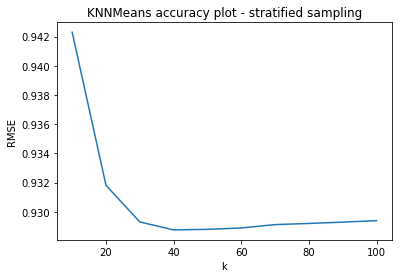

In [31]:
plt.plot(result_df_kX['k'], result_df_kX['RMSE'])
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('KNNMeans accuracy plot - stratified sampling')